<h1 align="center">Changes in PINCER indicators throughout the COVID-19 pandemic</h1>

Pharmacist-led information technology intervention (PINCER) is an effective way to reduce errors in prescription and medication monitoring which are responsible for a large proportion of adverse drug events. This is achieved through the monitoring of 14 PINCER indicators.

The purpose of this notebook is to describe practice level changes in adherence to each of the PINCER indicators  throughout the COVID-19 pandemic. For each indicator, the number of unique patients experiencing hazardous prescribing described by a given indicator at any point during the study period is provided. The total number of hazardous prescribing events for each indicator is also shown.  Practice level monthly rates of hazardous prescribing are calculated, ranked and used to calculate deciles of activity for each indicator, which are represented as decile charts.

The 14 PINCER measures include:
* [Gastrointestinal (GI) Bleed Indicators](#gi_bleed)
    * [Age 65+, on oral NSAID without gastroprotection (GI_P3A)](#a)
    * [H/O peptic ulcer, on oral NSAID without gastroprotection (GI_P3B)](#b)
    * [H/O peptic ulcer, on OAC without gastroprotection (GI_P3C)](#c)
    * [On OAC and oral NSAID (GI_P3D)](#d)
    * [On OAC and antiplatelet without gastroprotection (GI_P3E)](#e)
    * [On aspirin and antiplatelet without gastroprotection (GI_P3F)](#f)
* [Monitoring Indicators](#monitoring)
    * [Age 75+, on ACEI or loop, no renal function/electrolytes test (MO_P13)](#ac)
    * [Methotrexate audit (MO_P15)](#me)
        * [On methotrexate without recorded full blood count (FBC)](#me_no_fbc)
        * [On methotrexate without recorded liver functon test (LFT)](#me_no_lft)
    * [On lithium without recent lithium test (MO_P17)](#li)
    * [On amiodarone without recent thyroid function test (TFT) (MO_P18)](#am)
* [Other Indicators](#other)
    * [Asthma and non-selective BB (AS_P3G)](#g)
    * [Heart failure and oral NSAID (HF_P3I)](#i)
    * [eGFR <45 and oral NSAID (KI_P3K)](#k)
    
There are also a set of [composite indicators](#composites) which indicate the number of people with 1 or more of each of the broad measure categories:
* [GI Bleed Composite Indicator](#composite_gi_bleed)
* [Monitoring Composite Indicator](#composite_monitoring)
* [Other Composite Indicator](#composite_other)
* [Combined Composite Indicator](#composite_all)

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpllimg
import matplotlib as mpl
import json
from IPython.display import HTML, display, Markdown, Image
import os

backend =  os.getenv("OPENSAFELY_BACKEND", "expectations")
with open(f'../output/indicator_summary_statistics_{backend}.json') as f:
        summary = json.load(f)["summary"]

with open(f'../output/practice_count_{backend}.json') as f:
    practice_count_event = json.load(f)["num_practices_event"]

with open(f'../output/practice_count_{backend}.json') as f:
    practice_count = json.load(f)["num_practices"]

with open(f'../output/medians.json') as f:
    medians = json.load(f)["summary"]

num_gi_bleed_events = 0
num_monitoring_events = 0
num_other_events = 0


gi_bleed_indicators = ["a", "b", "c", "d", "e", "f"]
for i in gi_bleed_indicators:
    events = int(summary[i]['events'])
    num_gi_bleed_events += events

monitoring_indicators = ["ac", "me_no_fbc", "me_no_lft", "li", "am"]
for i in monitoring_indicators:
    events = int(summary[i]['events'])
    num_monitoring_events += events

other_prescribing_indicators = ["g", "i", "k"]
for i in other_prescribing_indicators:
    events = int(summary[i]['events'])
    num_other_events += events

def show_summary(indicator):
    display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary[indicator]['num_practices']} ({summary[indicator]['percent_practice']}%)"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary[indicator]['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary[indicator]['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {int(summary[indicator]['events']):,}"),
    Markdown(f"Q1 2020 median proportion: {round(medians[indicator]['pre'], 2)}"),
    Markdown(f"Q1 2021 median proportion: {round(medians[indicator]['post'], 2)}")
       
       )
        
def show_image(path):

    img=Image(path)
    display(img)

## Summary

In [116]:
display(
    Markdown(f"Total number of hazardous prescribing events throughout the study period: {int(summary['total_events'])}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['total_patients_denominator']}"),
    Markdown(f"Number of unique patients experiencing a hazardous prescribing event throughout the study period: {summary['total_patients']}"),
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {practice_count_event} ({round((practice_count_event/practice_count), 2) * 100}%)"),
       )

Total number of hazardous prescribing events throughout the study period: 53598

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 5863

Number of unique patients experiencing a hazardous prescribing event throughout the study period: 5863

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (100.0%)

<a id="gi_bleed"></a>
## Gastrointestinal (GI) Bleed Indicators


In [117]:
display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary['gi_bleed']['num_practices']}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['gi_bleed']['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary['gi_bleed']['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {num_gi_bleed_events:,}")
       )

Number of practices with at least one hazardous prescribing event throughout the study period: 39

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 5,803

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 5,661

Number of hazardous prescribing events throughout the study period: 20,086

<a id="a"></a>
### Age 65+, on oral NSAID without gastroprotection (GI_P3A)

Prescription of an oral NSAID in the previous 3 months to patients aged 65 or above who have been co-prescribed an ulcer healing drug in the previous 3 months.  

In [118]:
show_summary('a')

Number of practices with at least one hazardous prescribing event throughout the study period: 35 (89.74%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,435

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,541

Number of hazardous prescribing events throughout the study period: 4,496

Q1 2020 median proportion: 0.67

Q1 2021 median proportion: nan

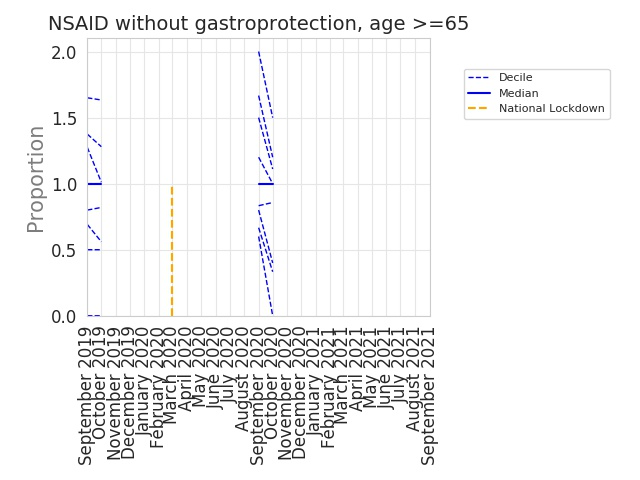

In [119]:
show_image("../output/figures/plot_a.jpeg")

<a id="b"></a>
### H/O peptic ulcer, on oral NSAID without gastroprotection (GI_P3B)

Prescription of an oral NSAID in the previous 3 months to patients with a history of peptic ulceration/gastric bleed.

In [120]:
show_summary('b')

Number of practices with at least one hazardous prescribing event throughout the study period: 35 (89.74%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,494

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,570

Number of hazardous prescribing events throughout the study period: 4,514

Q1 2020 median proportion: nan

Q1 2021 median proportion: 1.0

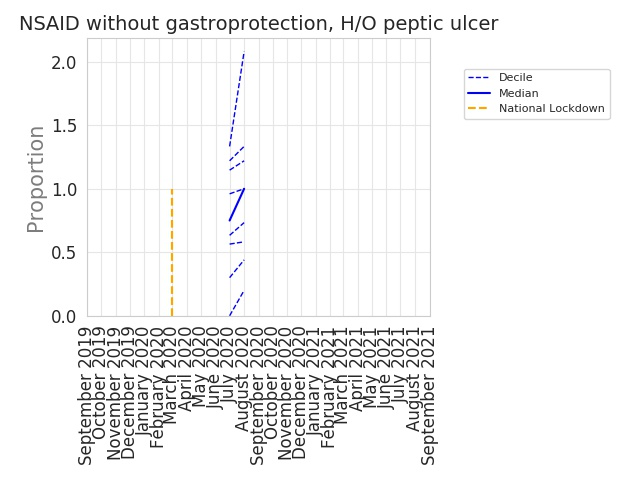

In [121]:
show_image("../output/figures/plot_b.jpeg")



<a id="c"></a>
### H/O peptic ulcer, on OAC without gastroprotection (GI_P3C)

Prescription of an aniplatelet drug in the previous 3 months in patients with a history of peptic ulceration/gatric bleed.

In [122]:
show_summary('c')

Number of practices with at least one hazardous prescribing event throughout the study period: 37 (94.87%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,576

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,510

Number of hazardous prescribing events throughout the study period: 4,472

Q1 2020 median proportion: 0.89

Q1 2021 median proportion: nan

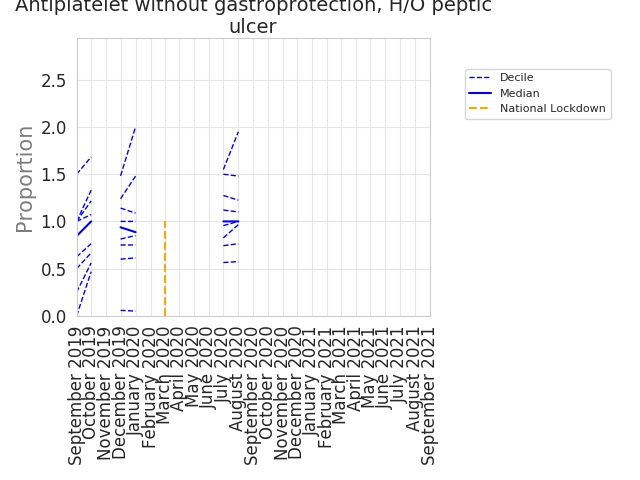

In [123]:
show_image("../output/figures/plot_c.jpeg")

<a id="d"></a>
### On OAC and oral NSAID (GI_P3D)

Prescription of warfarin or a DOAC in the previous 3 months and a preascription of an oral NSAID in the previous 3 months.

In [124]:
show_summary('d')

Number of practices with at least one hazardous prescribing event throughout the study period: 37 (94.87%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,524

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,532

Number of hazardous prescribing events throughout the study period: 4,499

Q1 2020 median proportion: nan

Q1 2021 median proportion: nan

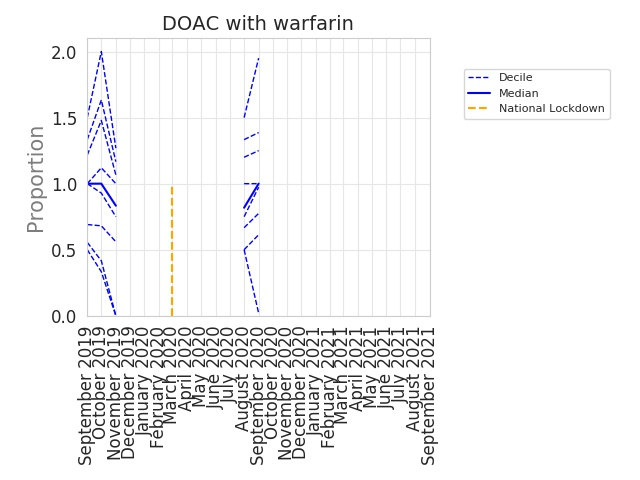

In [125]:
show_image("../output/figures/plot_d.jpeg")

<a id="e"></a>
### On OAC and antiplatelet without gastroprotection (GI_P3E)

Prescription of warfarin or a DOAC in combination with an antiplatelet drug in the previous 3 months without co-prescription of an ulcer-healing drug.

Note: "In combination" is defined as a co-prescription within 28 days of each other.


In [126]:
show_summary('e')

Number of practices with at least one hazardous prescribing event throughout the study period: 33 (84.62%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,575

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 996

Number of hazardous prescribing events throughout the study period: 1,045

Q1 2020 median proportion: 0.23

Q1 2021 median proportion: 0.16

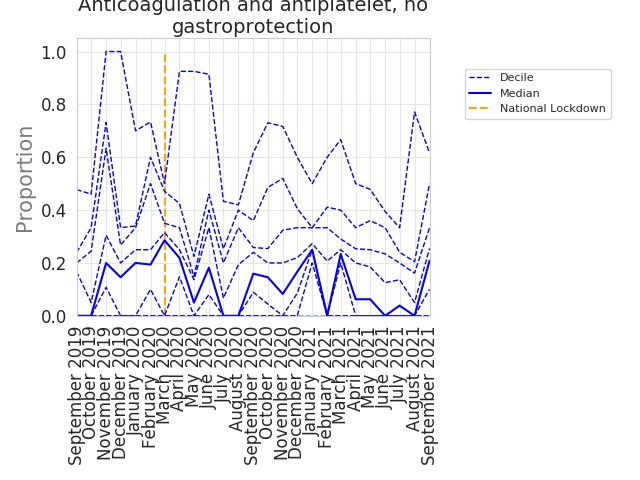

In [127]:
show_image("../output/figures/plot_e.jpeg")

<a id="f"></a>
### On aspirin and antiplatelet without gastroprotection (GI_P3F)

Prescription of aspirin in combination with another antiplatelet drug in the previous 3 months without co-prescription of an ulcer-healing drug.

Note: "In combination" is defined as a co-prescription within 28 days of each other.

In [128]:
show_summary('f')

Number of practices with at least one hazardous prescribing event throughout the study period: 30 (76.92%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,541

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 1,015

Number of hazardous prescribing events throughout the study period: 1,060

Q1 2020 median proportion: 0.1

Q1 2021 median proportion: 0.16

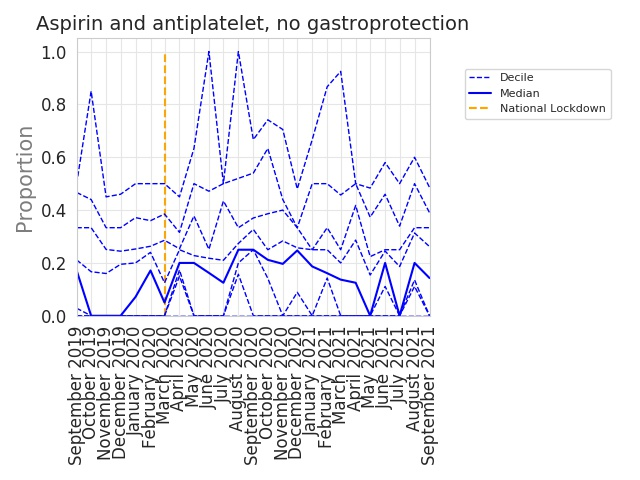

In [129]:
show_image("../output/figures/plot_f.jpeg")

<a id="monitoring"></a>
## Monitoring Indicators

In [130]:
display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary['monitoring']['num_practices']}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['monitoring']['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary['monitoring']['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {num_monitoring_events:,}")
       )

Number of practices with at least one hazardous prescribing event throughout the study period: 0

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 5,615

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 5,736

Number of hazardous prescribing events throughout the study period: 22,296

<a id="ac"></a>
### Age 75+, on ACEI or loop, no renal function/electrolytes test (MO_P13)

Absence of a computer-recorded check of renal function or electrolytes in the previous 15 months in patients aged 75 or over who have been prescripted an ACEi of loop diuretic in the previous 6 months.

In [131]:
show_summary('ac')

Number of practices with at least one hazardous prescribing event throughout the study period: 35 (89.74%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,576

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,489

Number of hazardous prescribing events throughout the study period: 4,458

Q1 2020 median proportion: nan

Q1 2021 median proportion: 0.75

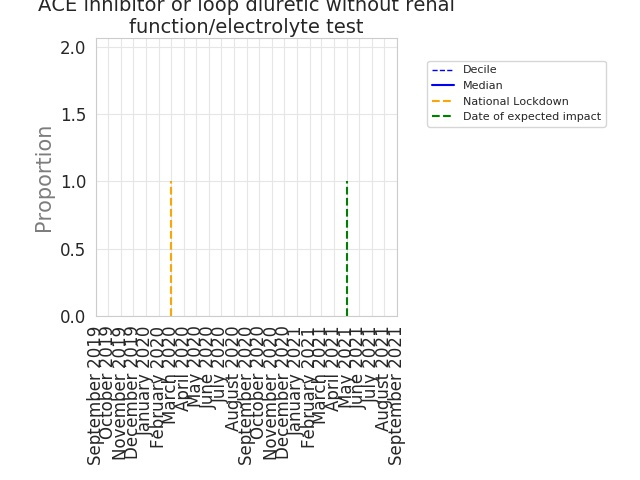

In [132]:
show_image("../output/figures/plot_ac.jpeg")

<a id="me"></a>
### Methotrexate audit (MO_P15)

<a id="me_no_fbc"></a>
#### On methotrexate without recorded full blood count

Absence of a recorded full blood count in the previous 3 months in patients who have been receiving a methotrexate prescription for at least 3 months.

In [133]:
show_summary('me_no_fbc')

Number of practices with at least one hazardous prescribing event throughout the study period: 38 (97.44%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,464

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,531

Number of hazardous prescribing events throughout the study period: 4,451

Q1 2020 median proportion: 1.0

Q1 2021 median proportion: nan

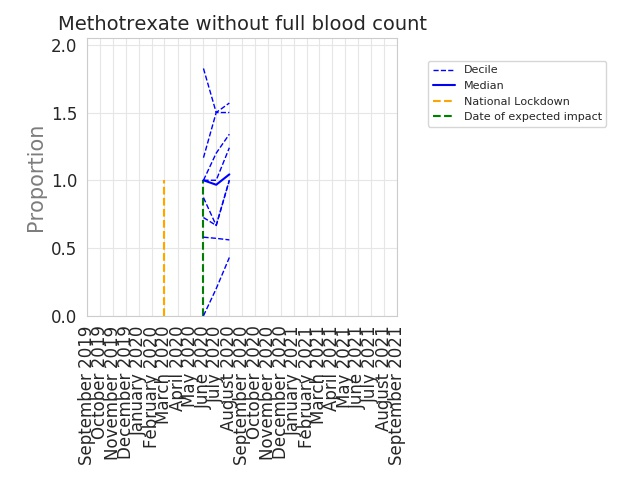

In [134]:
show_image("../output/figures/plot_me_no_fbc.jpeg")

<a id="me_no_lft"></a>
#### On methotrexate without recorded liver function test

Absence of a recorded liver function test in the previous 3 months in patients who have been receiving a methotrexate prescription for at least 3 months.

In [135]:
show_summary('me_no_lft')

Number of practices with at least one hazardous prescribing event throughout the study period: 37 (94.87%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,464

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,461

Number of hazardous prescribing events throughout the study period: 4,451

Q1 2020 median proportion: 0.88

Q1 2021 median proportion: nan

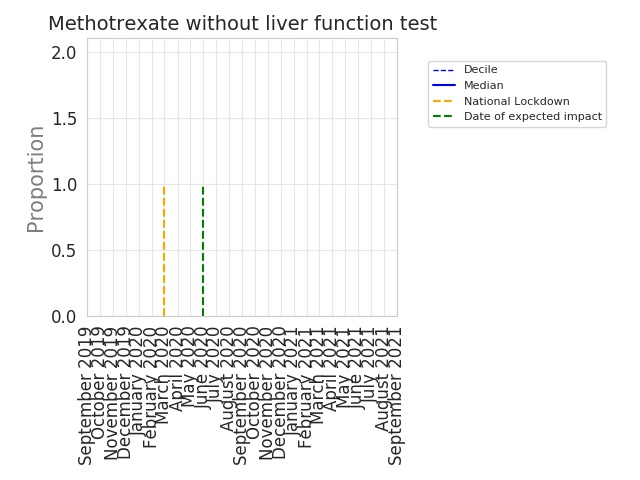

In [136]:
show_image("../output/figures/plot_me_no_lft.jpeg")

<a id="li"></a>
### On lithium without recent lithium test (MO_P17)

Absence of a recorded check of lithium concentration in the previous 3 months in patients who have been receiving a lithium prescription for at least 3 months.

In [137]:
show_summary('li')

Number of practices with at least one hazardous prescribing event throughout the study period: 37 (94.87%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,547

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,536

Number of hazardous prescribing events throughout the study period: 4,455

Q1 2020 median proportion: 1.0

Q1 2021 median proportion: nan

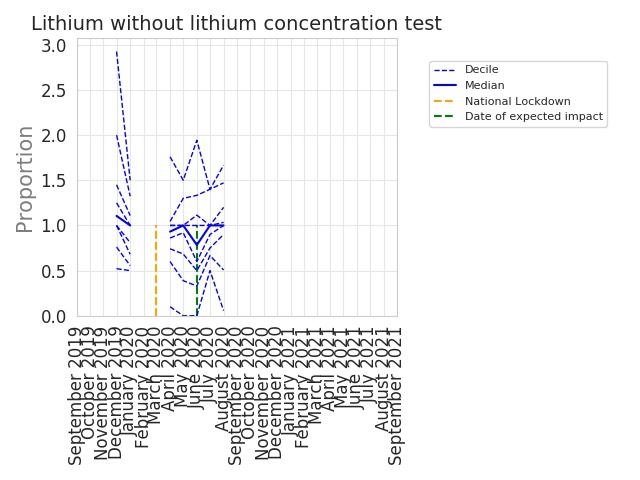

In [138]:
show_image("../output/figures/plot_li.jpeg")

<a id="am"></a>
### On amiodarone without recent thyroid function test (MO_P18)

Absence of a recorded thyroid function test in the previous 6 months in patients who have been receiving a lithium prescription for at least 6 months.

In [139]:
show_summary('am')

Number of practices with at least one hazardous prescribing event throughout the study period: 38 (97.44%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,523

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,521

Number of hazardous prescribing events throughout the study period: 4,481

Q1 2020 median proportion: 1.0

Q1 2021 median proportion: nan

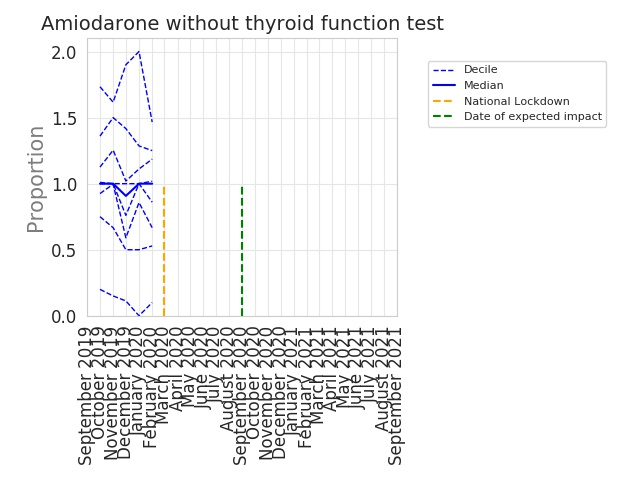

In [140]:
show_image("../output/figures/plot_am.jpeg")

<a id="other"></a>
## Other Indicators


In [141]:
display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary['other']['num_practices']}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['other']['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary['other']['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {num_other_events:,}")
       )

Number of practices with at least one hazardous prescribing event throughout the study period: 0

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 5,405

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 5,394

Number of hazardous prescribing events throughout the study period: 13,343

<a id="g"></a>
### Asthma and non-selective BB (AS_P3G)

Prescription of a non-selective beta-blocker in the previous 3 months in patients with a history of asthma.

Note: History of asthma is defined as patients with a recorded code for asthma without a more recent asthma resolved code.

In [142]:
show_summary('g')

Number of practices with at least one hazardous prescribing event throughout the study period: 35 (89.74%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,593

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,515

Number of hazardous prescribing events throughout the study period: 4,454

Q1 2020 median proportion: 1.01

Q1 2021 median proportion: nan

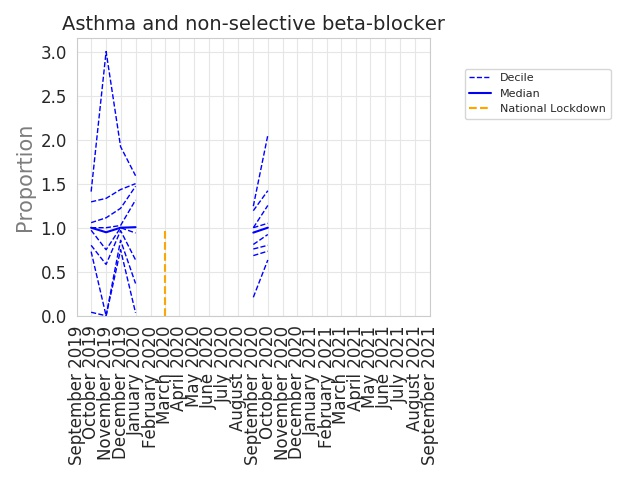

In [143]:
show_image("../output/figures/plot_g.jpeg")

<a id="i"></a>
### Heart failure and oral NSAID (HF_P3I)

Prescription of an oral NSAID in the previous 3 months in patients with heart failure.

In [144]:
show_summary('i')

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (100.0%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,548

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,538

Number of hazardous prescribing events throughout the study period: 4,458

Q1 2020 median proportion: nan

Q1 2021 median proportion: nan

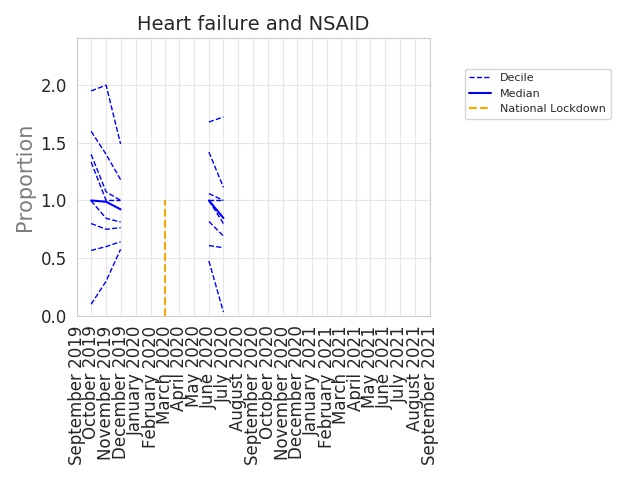

In [145]:
show_image("../output/figures/plot_i.jpeg")

<a id="k"></a>
### eGFR <45 and oral NSAID (KI_P3K)

Prescription of an oral NSAID in the previous 3 months to patients with an eGFR < 45.

In [146]:
show_summary('k')

Number of practices with at least one hazardous prescribing event throughout the study period: 36 (92.31%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 3,549

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 3,497

Number of hazardous prescribing events throughout the study period: 4,431

Q1 2020 median proportion: 0.94

Q1 2021 median proportion: nan

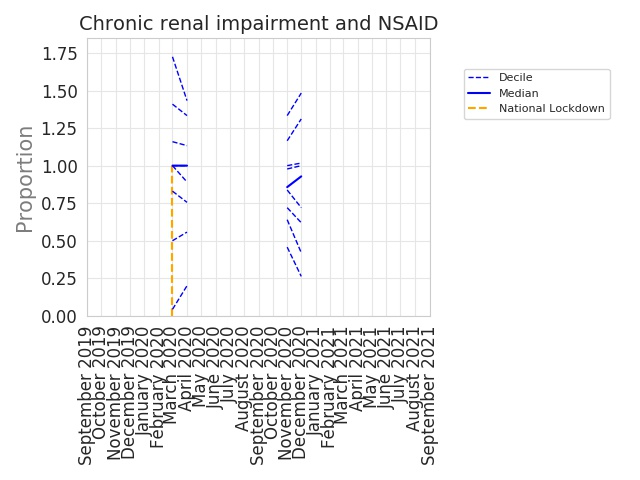

In [147]:
show_image("../output/figures/plot_k.jpeg")

<a id="composites"></a>
## Composite Indicators

<a id="composite_gi_bleed"></a>
### GI Bleed Composite Indicator

The number of patients that fall into 1, 2, 3, 4, 5, or all 6 GI bleed indicators.

Note: Where the number of patients that fall into a given number of indicators they are combined.

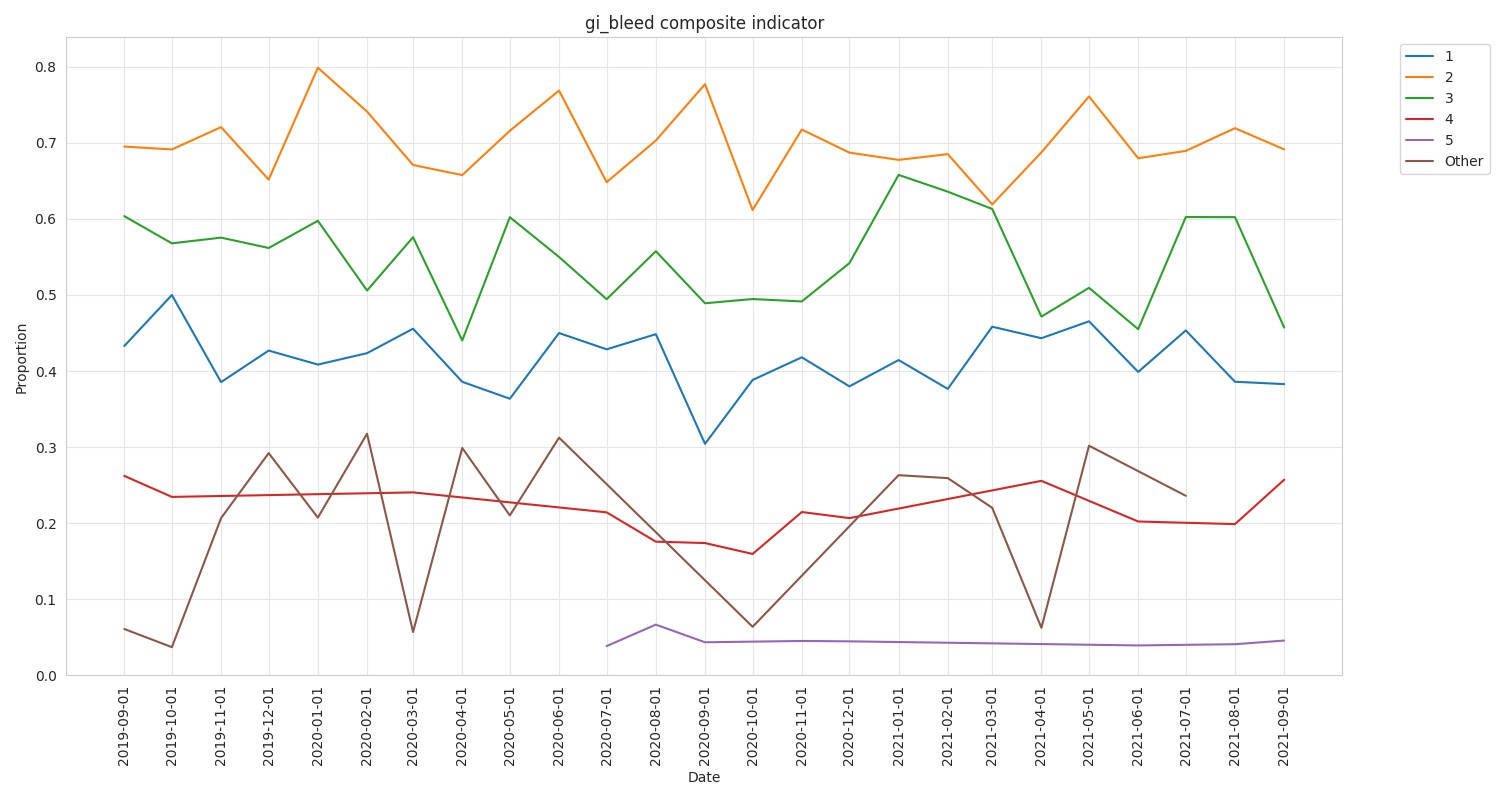

In [148]:
show_image("../output/figures/plot_gi_bleed_composite.jpeg")

<a id="composite_monitoring"></a>
### Monitoring Composite Indicator

The number of patients that fall into 1, 2, or all 3 of the monitoring indicators.

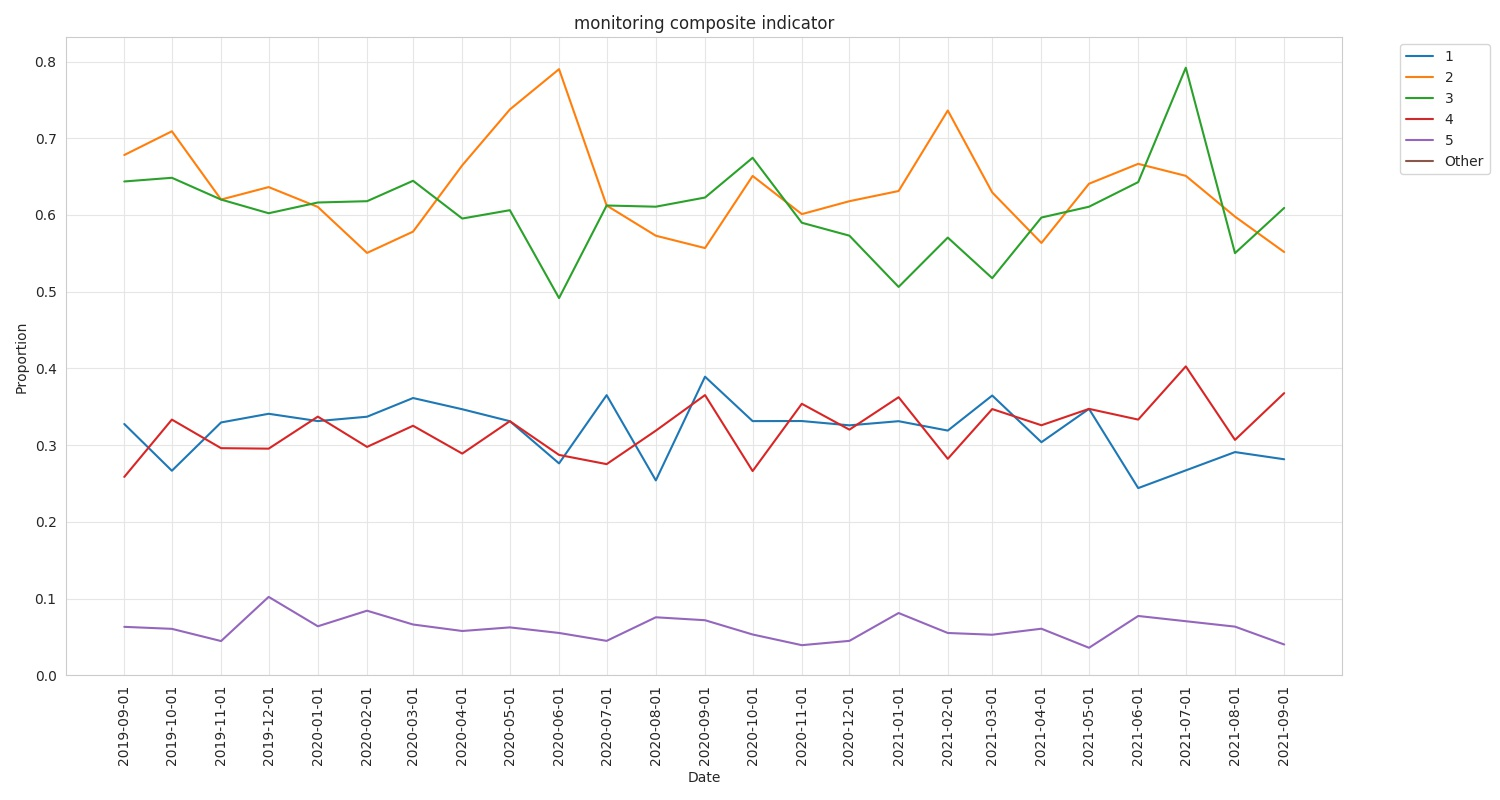

In [149]:
show_image("../output/figures/plot_monitoring_composite.jpeg")

<a id="composite_other"></a>
### Other Composite Indicator

The number of patients that fall into 1, 2, or all 3 of the "other" indicators.

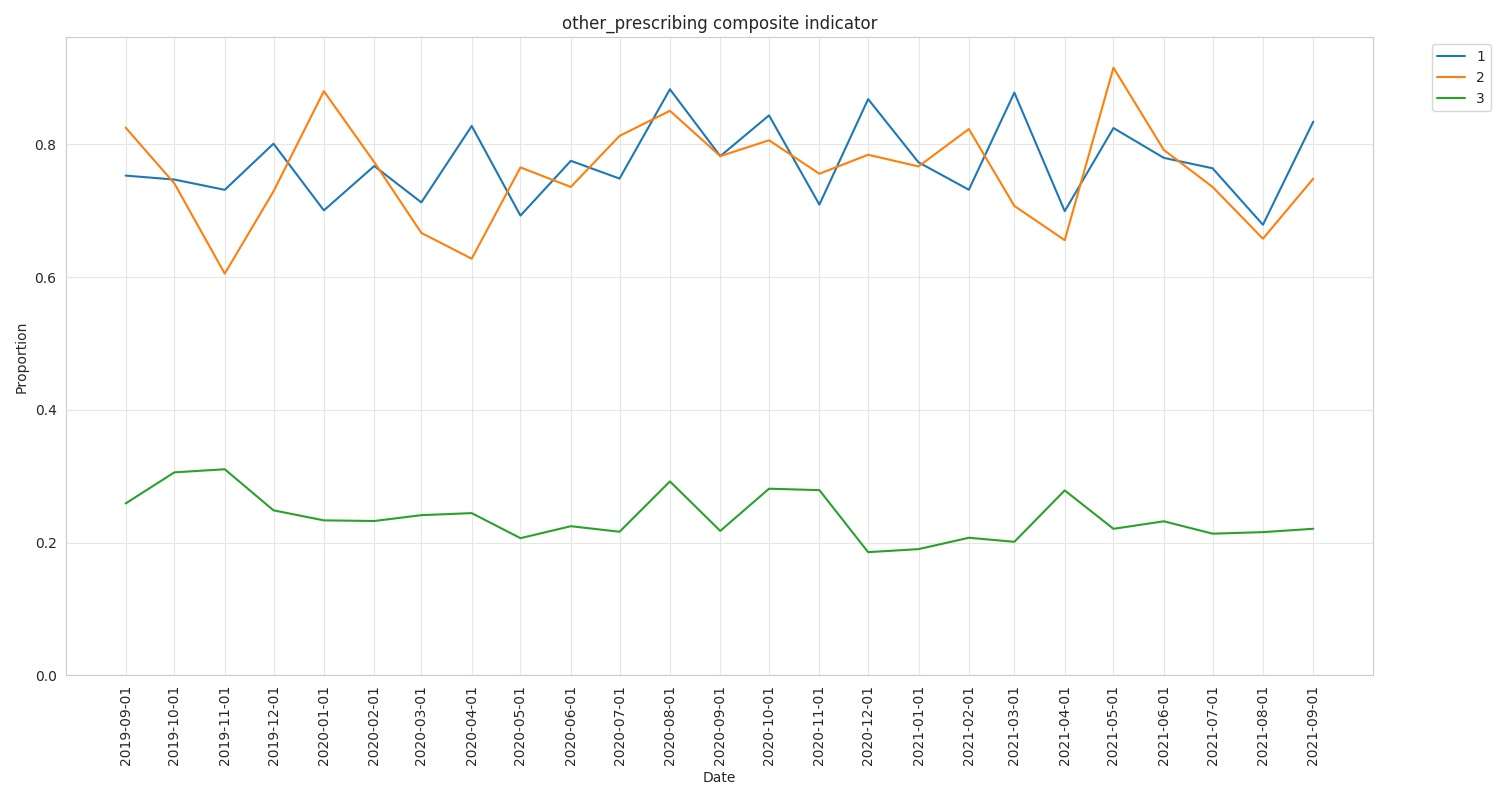

In [150]:
show_image("../output/figures/plot_other_prescribing_composite.jpeg")

<a id="composite_all"></a>
### Combined Composite Indicator

The number of patients that fall into 1, 2, 3, 4, 5, 6, or 7+ of any indicator.

Note: Where the number of patients that fall into a given number of indicators they are combined.

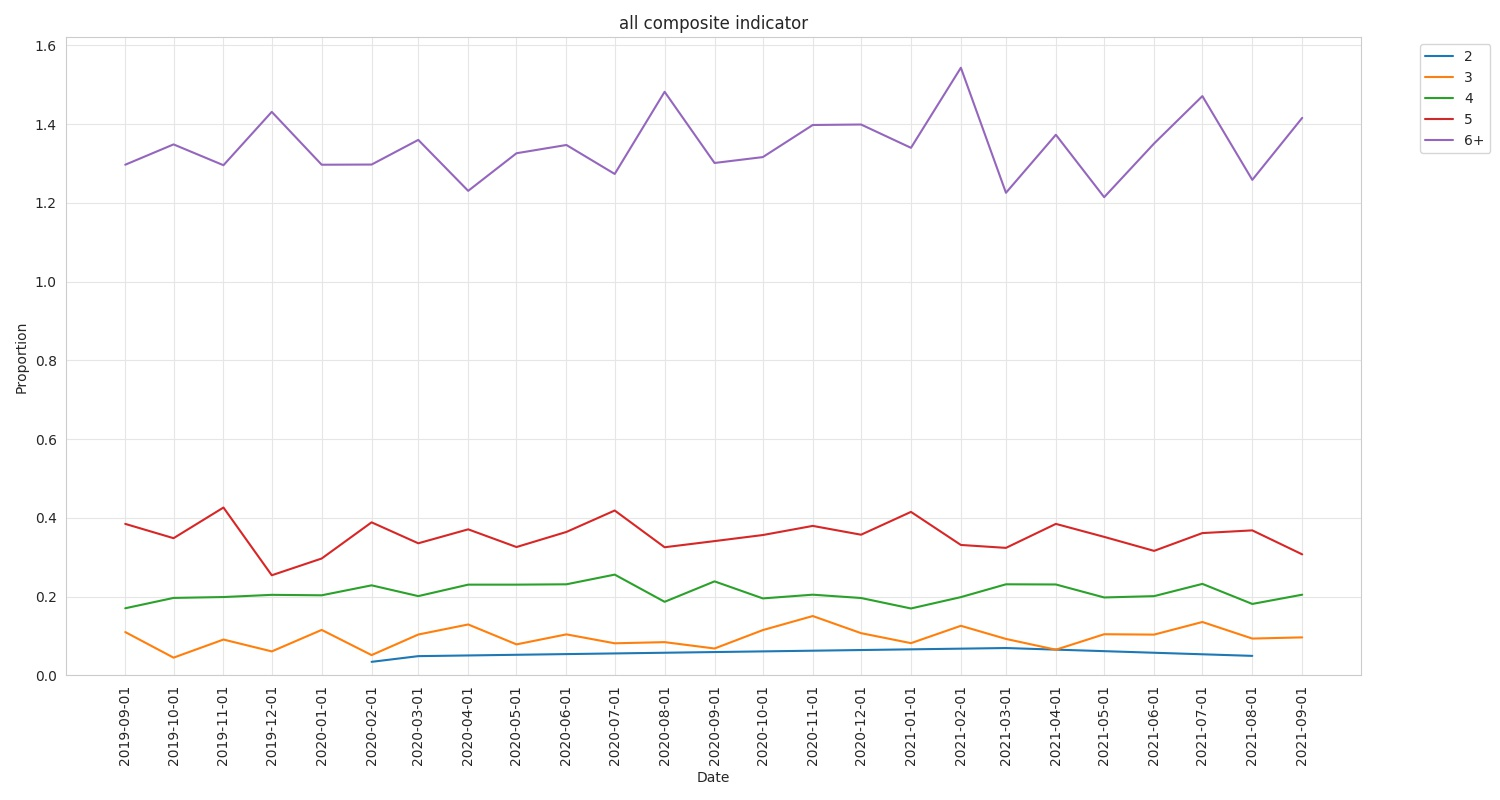

In [151]:
show_image("../output/figures/plot_all_composite.jpeg")